# Predicting Efficiency in NBA Players

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

This analysis is derived from the increase in statistical analysis surrounding the NBA in the 2010s. With the rise of statistics driving the league in terms of player allotted roles and playing time, we wanted to see if a player’s PER could be predicted or determined through a player’s measurements(i.e. height, weight) and collegiate performance(i.e. ppg, fgm, ftm, fg%, etc.). 

The main pieces of data we will be looking at are a player’s height, weight, and collegiate performance. We web scraped this information from basketball reference data and ran our analysis of those statistics alongside current day NBA player career PERs. From our analysis, we came to the conclusion that a regression model may not be able to predict a player's PER.

# Names

- Charles Ye (A15864281)
- Thomas Fratantoni (A15940388)
- Victor Thai (A16666301)
- Wajiullah Abdullah (A13013121)

<a id='research_question'></a>
# Research Question

Is there a relationship between a NCAA basketball player’s statistics (height, collegiate league performance, shooting performance, efficiency ratings) and their success/player efficiency rating in the NBA?

<a id='background'></a>

## Background & Prior Work

Is there a minimum height requirement for college basketball (NCAA) players to meet in order to be successful in the NBA? Many of these players are still growing with how young some are drafted, so even then draft scouts and teams are drafting based on potential for growth. According to Dimitrije Curcic in “70 years of Height Evolution in the NBA” the average NBA player is 6’6.3” (2021) which is the lowest it has been over the past 41 years. The last decade was the first in the history of the league where NBA players got shorter than a decade before Curcic expands. Although fewer in number, the death of the NBA big man has been greatly exaggerated as NBA big-men are dominating in shooting efficiency and PER, breaking all-time NBA records. To explore our question, we looked at field goal percentage, points per game, free throw percentage, field goals, three pointers both attempted and made per game, as well as effective field goal percentage throughout their collegiate and professional careers to find a relationship in these statistics to determine if college performance was determinant to NBA success. 

Field goal percentage is the ratio of field goals made to field goals attempted, although three-point field goal percentage can be calculated separately, three-point field goals are included in this general field goal percentage measurement. 

Effective field goal percentage is a statistic in basketball that adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

Points per game is the number of points a player has scored over the course of a game. 

Player efficiency rating is a benchmark statistic in the NBA that gauges the player’s per minute statistical production and relevance to their team. This statistic is widely used in sports analytics to determine the “best” performing players each season. The league average PER is always a clean cut 15.00, readjusting and recalculating each season as the NBA evolves statistically(i.e. more 3s).

According to Coates and Oguntimein in “The Length and Success of NBA Careers: Does College Production Predict Professional Outcomes?”, total points scored at the collegiate level had a significant correlation in regards to NBA draft position. While total points scored played a significant role in determining the players’ draft position, they had no correlation at all in accounting for points scored in the NBA possibly due to a variety of factors such as differences in officiating, offensive/defensive structures, and player roles. With this information in mind, we want to see if we can find a correlation between collegiate and NBA success using a broader metric such as PER rather than scoring.

With that in mind, Liu and O’Brien in “Are Role Players the Foundation of NBA Team Success?” show how team success has a relative correlation with strong high PER role players. While the NBA is still very much a star driven league (i.e. the top teams will ALWAYS have a player or multiple players in the top 20 PERs of the season as seen at basketball-reference.com), their success in the wins column and post season is largely dependent on the PER of the star(s)’ supporting cast.

As such, we believe that PER is a valuable statistic to help gauge the average NBA player’s individual performance and success in the NBA, but it’s not the end all be all. As Kelly Scaletta says in “The NBA’s 10 most meaningless stats and arguments” the problem with PER is that it doesn’t distinguish between an assisted field goal or an unassisted field goal, that way completely ignoring a player’s ability to create their own shot. What’s valuable about players who can create their own shots is that they can influence and change defensive schemes by themselves, and thus draw more attention to themselves and break down defenses.


References (include links):
- 1)https://www.bruinsportsanalytics.com/post/nba_roleplayers
- 2)https://paperzz.com/doc/7132806/the-length-and-success-of-nba-careers
- 3)https://runrepeat.com/height-evolution-in-the-nba
- 4)https://bleacherreport.com/articles/815181-nba-power-rankings-the-10-most-meaningless-stats-and-arguments-in-basketball

# Hypothesis


We hypothesize that the PER of a NBA player is correlated to their height and collegiate performance statistics such as field goal percentage, three point percentage, and free throw percentage.

# Dataset(s)

* Dataset Name: Basketball Reference NBA Player Directory
* Link to the dataset: https://www.basketball-reference.com/players/
* Number of observations: 4974
    
This database consists of NBA player background information, summary statistics, per game statistics in the NBA and totals for all players since the NBA was formed which we need for our analysis.

# Setup

Each player has their own designated webpage that lists their statistics, but it is important to note that there is no simple way to gain access to this information. As a result, we have applied and adapted webscraping code from Ben Pierce on https://data.world/login?next=%2Fbgp12%2Fnbancaacomparisons%2Fworkspace%2Ffile%3Ffilename%3Ddataget.py to which we give them full credit for.



This code uses Beautiful Soup, a HTML parser on python used for web scraping. Essentially, the code utilizes Beautiful Soup to search through each player's webpage looking for the first table to gain access to the player's background information hidden inside HTML's 'tbody' section (height, weight, first active, last active, college (if applicable), position). After collecting background information, it runs to find the average per game statisitcs hidden in 'tfoot' of the table which contains most of the information that we need for our dataset. 

An important thing to note is that this code does not grab an individual's PER, player efficiency rating, from their webpage. To implement this in the borrowed code, we had to add onto the existing code given that collected per game statistics to look through the 'p3' id under the HTML label for 'info'.

For simplicity and organization, we have also attached the edited web scraping code within our GitHub under the file 'basketball_reference_web_scraper.ipynb'. This helps to prevent any errors from the vast volume of the web scraping code with our project.



In [1]:
#import python packages
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

# Data Cleaning

In [2]:
#First let us clean the web scraped nba_players_w_PER dataset, which has all the NBA and NCAA (collegiate) basketball player data.
players = pd.read_csv('nba_players_w_PER.csv')
players.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,NCAA_efgpct,PER
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",...,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN,NaN,13.0
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",...,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN,NaN,15.1
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",...,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN,NaN,24.6
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",...,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372,NaN,15.4
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",...,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322,NaN,11.4


In [3]:
#Significant number of columns and listed below are the definitions of each column.
players.columns

Index(['Unnamed: 0', 'url', 'name', 'active_from', 'active_to', 'position',
       'college', 'height', 'weight', 'birth_date', 'NBA_fg%', 'NBA_g_played',
       'NBA_ppg', 'NBA_ft%', 'NBA_fg_per_game', 'NBA_fga_per_game',
       'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA__3ptpg', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA_efgpct', 'NCAA_fgpct', 'NCAA_games', 'NCAA_ppg',
       'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg',
       'NCAA__3ptpg', 'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA_efgpct', 'PER'],
      dtype='object')

The 34 columns of the dataset have the following definitions...

| Column Name | Definition |
| ----------- | ---------- |
| 'Unnamed: 0' | excess column with no meaning, exactly the same as index|
| 'url' | url of the player website from basketball-reference.com/ + 'url'|
| 'name' | name of the player |
| 'active_from' | when they started playing in NBA |
| 'active_to' | when they stopped playing in NBA |
| 'position' | position that they played in the NBA |
| 'college' | college that player attended |
| 'weight' | weight of the player |
| 'birth_date' | birthdate of player |
| 'NBA_fg%' | NBA field goal percent |
| 'NBA_g_played' | NBA games played |
| 'NBA_ppg' | NBA average points per game |
| 'NBA_ft%' | NBA free throw percent |
| 'NBA_fg_per_game' | NBA average field goals per game |
| 'NBA_fga_per_game' | NBA average field goal attempts per game |
| 'NBA_ft_per_g' | NBA averagefree throws per game |
| 'NBA_fta_p_g' | NBA average free throws attempted per game | 
| ''NBA__3ptpg' | NBA average 3 point points per game | 
| 'NBA__3ptapg' | NBA average 3 point points attempted per game |
| 'NBA_efgpct' | NBA effective field goal percentage |
| 'NCAA_fgpct' | NCAA field goal percent |
| 'NCAA_games' | NCAA games played |
| 'NCAA_ppg' | NCAA average points per game |
| 'NCAA_ft' | NCAA average free throws per game |
| 'NCAA_fgpg' | NCAA averafe field goals per game |
| 'NCAA_fgapg' | NCAA average field goal attempts per game |
| 'NCAA_ftpg' | NCAA average free throws per game |
| 'NCAA_ftapg' | NCAA average free throws attempted per game |
| 'NCAA__3ptpg' | NCAA average 3 points per game |
| 'NCAA__3ptapg' | NCAA average 3 point attempted per game |
| 'NCAA__3ptpct' | NCAA 3 point percent |
| 'NCAA_efgpct' | NCAA effective field goal percent |
| 'PER' | NBA player efficiency rating |

In [4]:
# describing data and looking for any unique trends/patterns
players.describe()

,Unnamed: 0,active_from,active_to,weight,NBA_fg%,NBA_g_played,NBA_ppg,NBA_ft%,NBA_fg_per_game,NBA_fga_per_game,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,NCAA_efgpct
count,4973.000000,4973.000000,4973.000000,4968.000000,4937.000000,4973.000000,4973.000000,4728.000000,4973.000000,4973.000000,...,3287.000000,3280.000000,3287.000000,3259.000000,3287.000000,3279.000000,2042.000000,2042.000000,2100.000000,0.0
mean,2486.000000,1988.063141,1992.266037,209.326490,0.409057,268.871104,6.385642,0.698962,2.438106,5.752202,...,13.702677,0.714109,5.093094,10.461829,2.922848,4.081610,0.913908,2.532321,0.323875,NaN
std,1435.725775,22.329240,23.075182,26.049095,0.108477,310.179579,4.760793,0.140654,1.810070,3.870099,...,4.628367,0.089708,1.804854,3.746143,1.268152,1.684578,0.801617,2.107385,0.132159,NaN
min,0.000000,1947.000000,1947.000000,114.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,0.295000,0.600000,1.200000,0.300000,0.300000,0.000000,0.000000,0.000000,NaN
25%,1243.000000,1971.000000,1974.000000,190.000000,0.366000,31.000000,2.800000,0.633000,1.100000,2.800000,...,10.600000,0.662000,3.900000,7.900000,2.100000,2.900000,0.100000,0.400000,0.298000,NaN
50%,2486.000000,1990.000000,1995.000000,210.000000,0.423000,125.000000,5.200000,0.719000,2.000000,4.900000,...,13.500000,0.722000,4.900000,10.200000,2.800000,3.900000,0.800000,2.400000,0.348000,NaN
75%,3729.000000,2008.000000,2014.000000,225.000000,0.465000,446.000000,8.700000,0.784000,3.300000,7.900000,...,16.400000,0.773000,6.100000,12.600000,3.600000,5.000000,1.500000,4.100000,0.383000,NaN
max,4972.000000,2022.000000,2022.000000,360.000000,1.000000,1611.000000,30.100000,1.000000,12.100000,23.800000,...,44.200000,1.745000,16.700000,38.100000,10.800000,14.400000,4.000000,10.800000,1.000000,NaN


In [5]:
#columns with null values
players.isna().sum()

Unnamed: 0             0
url                    0
name                   0
active_from            0
active_to              0
position               0
college              351
height                 0
weight                 5
birth_date            18
NBA_fg%               36
NBA_g_played           0
NBA_ppg                0
NBA_ft%              245
NBA_fg_per_game        0
NBA_fga_per_game       0
NBA_ft_per_g           0
NBA_fta_p_g            0
NBA__3ptpg          1128
NBA__3ptapg         1128
NBA__3ptpct         1647
NBA_efgpct          1158
NCAA_fgpct          1714
NCAA_games          1686
NCAA_ppg            1686
NCAA_ft             1693
NCAA_fgpg           1686
NCAA_fgapg          1714
NCAA_ftpg           1686
NCAA_ftapg          1694
NCAA__3ptpg         2931
NCAA__3ptapg        2931
NCAA__3ptpct        2873
NCAA_efgpct         4973
PER                    0
dtype: int64

Looking at the null values and the decribe method, we decided to drop the following columns.

- **'NCAA_efgpct'**: collegiate effective field goal percentage which is null for all players.

- **'Unnamed: 0'**: excess column that just has index.


Columns that have null values are college, weight, birth_date, NBA_fg%, NBA_ft%, NBA__3ptpg, NBA__3ptapg, NBA__3ptpct, NBA_efgpct, NCAA_fgpct, NCAA_games, NCAA_ppg, NCAA_ft, NCAA_fgpg, NCAA_fgapg, NCAA_ftpg, NCAA_ftapg, NCAA__3ptpg, NCAA__3ptapg, NCAA__3ptpct, NCAA_efgpct which we will look further into.

In [6]:
#dropping columns
players = players.drop(columns = ['Unnamed: 0','NCAA_efgpct'], axis = 1)
players

,url,name,active_from,active_to,position,college,height,weight,birth_date,NBA_fg%,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,PER
0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",0.502,...,8.5,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN,13.0
1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",0.428,...,22.3,0.645,7.8,16.8,6.7,10.4,NaN,NaN,NaN,15.1
2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",0.559,...,26.4,0.628,10.7,16.8,5.0,7.9,NaN,NaN,NaN,24.6
3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",0.442,...,29.0,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372,15.4
4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",0.417,...,13.6,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,NaN,6-10,266.0,"January 4, 1997",0.581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4
4969,/players/z/zoetji01.html,Jim Zoet,1983,1983,C,Kent State University,7-1,240.0,"December 20, 1953",0.200,...,3.2,0.429,1.4,2.9,0.4,1.0,NaN,NaN,NaN,-0.8
4970,/players/z/zopfbi01.html,Bill Zopf,1971,1971,G,Duquesne,6-1,170.0,"June 7, 1948",0.363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6
4971,/players/z/zubaciv01.html,Ivica Zubac,2017,2022,C,NaN,7-0,240.0,"March 18, 1997",0.592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3


In [7]:
#finding who are the ones that have missing weight values
weight_missing = players[players['weight'].isnull() == True]
weight_missing_index = weight_missing.index
players.loc[weight_missing_index]

,url,name,active_from,active_to,position,college,height,weight,birth_date,NBA_fg%,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,PER
2584,/players/l/leedi01.html,Dick Lee,1968,1968,F,Washington,6-6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.7
3049,/players/m/mitchmu01.html,Murray Mitchell,1950,1950,C,Sam Houston State University,6-6,NaN,"March 19, 1923",0.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
3256,/players/n/nolenpa01.html,Paul Nolen,1954,1954,C,Texas Tech,6-10,NaN,"September 3, 1929",0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.5
4681,/players/w/wertira01.html,Ray Wertis,1947,1948,G,St. John's,5-11,NaN,"July 30, 1923",0.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
4890,/players/w/woodbo01.html,Bob Wood,1950,1950,G,Northern Illinois,5-10,NaN,"October 7, 1921",0.214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-


In [8]:
#the weights of these players cannot be found anywhere.
#so dropping these players since its old and they didn't play for long. 
players = players.drop(index=weight_missing_index, axis=0).reset_index()

In [9]:
#finding birthdays that are missing
birthday_missing = players[players['birth_date'].isnull() == True]
birthday_missing
birthday_missing_index = birthday_missing.index
players.loc[birthday_missing_index].head(5)

,index,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA__3ptpg,NCAA__3ptapg,NCAA__3ptpct,PER
58,58,/players/a/allenbi01.html,Bill Allen,1968,1968,C-F,New Mexico State,6-8,205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9
525,525,/players/b/brookcl01.html,Clarence Brookins,1971,1971,F,Temple,6-4,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7
647,647,/players/b/byrdwa01.html,Walter Byrd,1970,1970,F,Temple,6-7,205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3
1782,1782,/players/h/hardyda01.html,Darrell Hardy,1968,1968,F,Baylor,6-7,220.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3
2428,2428,/players/k/kirklwi01.html,Wilbur Kirkland,1970,1970,F,Cheyney (PA),6-7,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6


In [10]:
#dropping these rows since we can't find the birthdays for them 
#and their active time frame is within the same year so should not have influence on our analysis.
players = players.drop(index = birthday_missing_index, axis = 0).reset_index()

The '3 point shot' was not adopted into the NBA until 1980. This means that players that played before this time cannot must not have shot a 3 point shot. So we can replace their null values with 0's since they didn't shoot a 3 point shot.

The same applies for games for NCAA games,except that the NCAA adopted the 3 point shot in 1986.



https://www.usab.com/youth/news/2011/06/the-history-of-the-3-pointer.aspx

In [11]:
players.columns

Index(['level_0', 'index', 'url', 'name', 'active_from', 'active_to',
       'position', 'college', 'height', 'weight', 'birth_date', 'NBA_fg%',
       'NBA_g_played', 'NBA_ppg', 'NBA_ft%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA__3ptpg',
       'NBA__3ptapg', 'NBA__3ptpct', 'NBA_efgpct', 'NCAA_fgpct', 'NCAA_games',
       'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg',
       'NCAA_ftapg', 'NCAA__3ptpg', 'NCAA__3ptapg', 'NCAA__3ptpct', 'PER'],
      dtype='object')

In [12]:
# player years that did not have nba 3 point data
players[players['NBA__3ptpg'].isna()]['active_to'].sort_values().unique()

array([1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979])

In [13]:
# making 3 point shot values equal 0 since 3 point was not used before 1980 NBA games
players.loc[((players['NBA__3ptpg'].isna())&(players['active_from']<1980)), ['NBA__3ptpg','NBA__3ptpct','NBA__3ptapg']] = 0

#making 3 point shot values equal to 0 since 3 point was not used before 1987 NCAA games
players.loc[((players['NCAA__3ptpg'].isna())&(players['active_from']<1987)), ['NCAA__3ptpg','NCAA__3ptapg', 'NCAA__3ptpct']] = 0

In [14]:
# if they scored 0 field goals, free throws, 3 point, then their percentages are 0.
players.loc[((players['NBA_fg%'].isna()) & (players['NBA_fg_per_game'] == 0)), 'NBA_fg%'] = 0
players.loc[((players['NBA_ft%'].isna()) & (players['NBA_ft_per_g'] == 0)), 'NBA_ft%'] = 0
players.loc[((players['NBA__3ptpct'].isna()) & (players['NBA__3ptpg'] == 0)), 'NBA_3ptpct'] = 0
players.loc[((players['NBA_efgpct'].isna()) & (players['NBA_fg_per_game'] == 0)), 'NBA_efgpct'] = 0

In [15]:
#updated null values in columns
players.isna().sum()

level_0                0
index                  0
url                    0
name                   0
active_from            0
active_to              0
position               0
college              351
height                 0
weight                 0
birth_date             0
NBA_fg%                0
NBA_g_played           0
NBA_ppg                0
NBA_ft%                0
NBA_fg_per_game        0
NBA_fga_per_game       0
NBA_ft_per_g           0
NBA_fta_p_g            0
NBA__3ptpg             0
NBA__3ptapg            0
NBA__3ptpct          511
NBA_efgpct          1091
NCAA_fgpct          1692
NCAA_games          1664
NCAA_ppg            1664
NCAA_ft             1671
NCAA_fgpg           1664
NCAA_fgapg          1692
NCAA_ftpg           1664
NCAA_ftapg          1672
NCAA__3ptpg          656
NCAA__3ptapg         656
NCAA__3ptpct         617
PER                    0
NBA_3ptpct          4440
dtype: int64

In [16]:
#adding a column that tells us how long players play in NBA
players['years_played_NBA'] = players['active_to']-players['active_from']

In [17]:
#taking a look at the columns we have now
players.columns

Index(['level_0', 'index', 'url', 'name', 'active_from', 'active_to',
       'position', 'college', 'height', 'weight', 'birth_date', 'NBA_fg%',
       'NBA_g_played', 'NBA_ppg', 'NBA_ft%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft_per_g', 'NBA_fta_p_g', 'NBA__3ptpg',
       'NBA__3ptapg', 'NBA__3ptpct', 'NBA_efgpct', 'NCAA_fgpct', 'NCAA_games',
       'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg',
       'NCAA_ftapg', 'NCAA__3ptpg', 'NCAA__3ptapg', 'NCAA__3ptpct', 'PER',
       'NBA_3ptpct', 'years_played_NBA'],
      dtype='object')

In [18]:
#putting into consistent data types
players.dtypes

level_0               int64
index                 int64
url                  object
name                 object
active_from           int64
active_to             int64
position             object
college              object
height               object
weight              float64
birth_date           object
NBA_fg%             float64
NBA_g_played          int64
NBA_ppg             float64
NBA_ft%             float64
NBA_fg_per_game     float64
NBA_fga_per_game    float64
NBA_ft_per_g        float64
NBA_fta_p_g         float64
NBA__3ptpg          float64
NBA__3ptapg         float64
NBA__3ptpct         float64
NBA_efgpct          float64
NCAA_fgpct          float64
NCAA_games          float64
NCAA_ppg            float64
NCAA_ft             float64
NCAA_fgpg           float64
NCAA_fgapg          float64
NCAA_ftpg           float64
NCAA_ftapg          float64
NCAA__3ptpg         float64
NCAA__3ptapg        float64
NCAA__3ptpct        float64
PER                  object
NBA_3ptpct          

In [22]:
#casting college column to string type
players['college'] = players['college'].astype(str)

#casting position to string type
players['position'] = players['position'].astype(str)

#casting PER to float type
def per_float(per):
    if per == '-':
        #there is one value that has just a '-' so we will set that to 0
        return 0
    else:
        return float(per)
players['PER'] = players['PER'].apply(per_float) 

#casting height to int type
def height_inches(height):
    feet = int(height[0])
    inches = 0
    if len(height) == 4:
        inches = int(height[2:4] )
    if len(height) == 3:
        inches = int(height[2])
    return (feet * 12) + inches
players['height'] = players['height'].apply(height_inches)

In [23]:
#Since the birthdays are written out in readable format, we want something that we can work with in pandas.
players['birth_date']

0           June 24, 1968
1           April 7, 1946
2          April 16, 1947
3           March 9, 1969
4        November 3, 1974
              ...        
4946      January 4, 1997
4947    December 20, 1953
4948         June 7, 1948
4949       March 18, 1997
4950    December 19, 1919
Name: birth_date, Length: 4951, dtype: object

In [24]:
#changing written birthdates into numerical ones that we can manipulate in the dataframe
def birthdate(day):
    day = day.replace(',', '')
    day = day.lower()

    output = datetime.strptime(day, '%B %d %Y')
    return output.date()

players['birth_date'] = players['birth_date'].apply(birthdate)

In [25]:
#cleaning up player columns
players = players.rename(columns={'name':'player_name','NBA_fg_per_game':'NBA_fgpg',
                        'NBA_fga_per_game':'NBA_fgapg','NBA_ft_per_g':'NBA_ftpg','NBA_fta_p_g':'NBA_ftapg',
                       'NBA__3ptpg':'NBA_3ptpg','NBA__3ptapg':'NBA_3ptapg','NBA__3ptpct':'NBA_3pt%',
                       'NBA_efgpct':'NBA_efg%','NCAA_fgpct':'NCAA_fg%','NCAA__3ptpg':'NCAA_3ptpg',
                       'NCAA__3ptapg':'NCAA_3ptapg','NCAA__3ptpct':'NCAA_3pt%','PER':'NBA_per'})
#organize the dataframe and relabel columns
columns = ['player_name','height','weight','birth_date','active_from','active_to','position',
           'years_played_NBA','college','NBA_g_played', 'NBA_per', 'NBA_fg%', 'NBA_ppg',
       'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg', 'NBA_ftpg',
       'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%', 'NBA_efg%',
       'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft', 'NCAA_fgpg',
       'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg', 'NCAA_3ptapg',
       'NCAA_3pt%']
players = players[columns]
players.head()

,player_name,height,weight,birth_date,active_from,active_to,position,years_played_NBA,college,NBA_g_played,...,NCAA_games,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%
0,Alaa Abdelnaby,82,240.0,1968-06-24,1991,1995,F-C,4,Duke,256,...,134.0,8.5,0.728,3.3,5.6,1.8,2.5,0.0,0.0,NaN
1,Zaid Abdul-Aziz,81,235.0,1946-04-07,1969,1978,C-F,9,Iowa State,505,...,75.0,22.3,0.645,7.8,16.8,6.7,10.4,0.0,0.0,0.000
2,Kareem Abdul-Jabbar,86,225.0,1947-04-16,1970,1989,C,19,UCLA,1560,...,88.0,26.4,0.628,10.7,16.8,5.0,7.9,0.0,0.0,0.000
3,Mahmoud Abdul-Rauf,73,162.0,1969-03-09,1991,2001,G,10,LSU,586,...,64.0,29.0,0.863,10.4,21.9,5.5,6.4,2.7,7.2,0.372
4,Tariq Abdul-Wahad,78,223.0,1974-11-03,1998,2003,F,5,"Michigan, San Jose State",236,...,87.0,13.6,0.726,4.9,10.4,3.2,4.4,0.6,1.7,0.322


In [26]:
#After renaming the columns, we are left with these renamed columns which we will use for our analysis.
players.columns

Index(['player_name', 'height', 'weight', 'birth_date', 'active_from',
       'active_to', 'position', 'years_played_NBA', 'college', 'NBA_g_played',
       'NBA_per', 'NBA_fg%', 'NBA_ppg', 'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg',
       'NBA_ftpg', 'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%',
       'NBA_efg%', 'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%'],
      dtype='object')

In [27]:
#nba players that did not go to college
no_college = players[players['college'] == 'nan']
no_college

#add a new column that tells whether or not they went to college
def going_college(val):
    if val == 'nan':
        return False
    else:
        return True

players['go_college'] = players['college'].apply(going_college)

In [28]:
#players that did not go to college and have null ncaa games, meaning they did not play in the NCAA
players.loc[((players['go_college'] == False)&(players['NCAA_games'].isna())), ['NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%']] = 0

The '3 point shot' was not adopted into the NBA until 1980. This means that players that played before this time cannot must not have shot a 3 point shot. So we can replace their null values with 0's since they didn't shoot a 3 point shot.

The same applies for games for NCAA games,except that the NCAA adopted the 3 point shot in 1986.



https://www.usab.com/youth/news/2011/06/the-history-of-the-3-pointer.aspx

In [29]:
#many players listed here did not play in the NCAA, but went to college. A vast majority instead played in the junior college basketball league,played in another country, or signed with different leagues.
players[(players['NCAA_games'].isna())&(players['go_college']==True)].sort_values('active_from')

,player_name,height,weight,birth_date,active_from,active_to,position,years_played_NBA,college,NBA_g_played,...,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%,go_college
8,John Abramovic,75,195.0,1919-02-09,1947,1948,F,1,Salem University,56,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2759,Press Maravich,72,185.0,1915-08-29,1947,1947,G,0,Davis & Elkins College,51,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2748,Frank Mangiapane,70,195.0,1925-08-05,1947,1947,G,0,NYU,6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2729,John Mahnken,80,220.0,1922-06-16,1947,1953,C,6,Georgetown,414,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
2688,Al Lujack,75,220.0,1920-10-05,1947,1947,F,0,Georgetown,5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,Jared Terrell,75,227.0,1995-02-10,2019,2019,G,0,Rhode Island,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4313,Emanuel Terry,81,220.0,1996-08-21,2019,2019,F,0,Lincoln Memorial,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4327,Brodric Thomas,77,185.0,1997-01-28,2021,2022,G,1,Truman State University,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3934,Jay Scrubb,77,220.0,2000-09-01,2021,2022,G-F,1,John A. Logan College,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [30]:
players.columns

Index(['player_name', 'height', 'weight', 'birth_date', 'active_from',
       'active_to', 'position', 'years_played_NBA', 'college', 'NBA_g_played',
       'NBA_per', 'NBA_fg%', 'NBA_ppg', 'NBA_ft%', 'NBA_fgpg', 'NBA_fgapg',
       'NBA_ftpg', 'NBA_ftapg', 'NBA_3ptpg', 'NBA_3ptapg', 'NBA_3pt%',
       'NBA_efg%', 'NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%', 'go_college'],
      dtype='object')

In [31]:
#players that did not play in ncaa should have ncaa_games be at 0
no_ncaa_games = players[(players['NCAA_games'].isna())]
players.loc[((players['NCAA_games'].isna())), ['NCAA_fg%', 'NCAA_games', 'NCAA_ppg', 'NCAA_ft',
       'NCAA_fgpg', 'NCAA_fgapg', 'NCAA_ftpg', 'NCAA_ftapg', 'NCAA_3ptpg',
       'NCAA_3ptapg', 'NCAA_3pt%']] = 0

In [32]:
players.isna().sum()

player_name            0
height                 0
weight                 0
birth_date             0
active_from            0
active_to              0
position               0
years_played_NBA       0
college                0
NBA_g_played           0
NBA_per                0
NBA_fg%                0
NBA_ppg                0
NBA_ft%                0
NBA_fgpg               0
NBA_fgapg              0
NBA_ftpg               0
NBA_ftapg              0
NBA_3ptpg              0
NBA_3ptapg             0
NBA_3pt%             511
NBA_efg%            1091
NCAA_fg%              28
NCAA_games             0
NCAA_ppg               0
NCAA_ft                8
NCAA_fgpg              0
NCAA_fgapg            28
NCAA_ftpg              0
NCAA_ftapg             8
NCAA_3ptpg           269
NCAA_3ptapg          269
NCAA_3pt%            230
go_college             0
dtype: int64

At this point in our data cleaning, we are no longer able to clean the data any longer. The remaining null values are values that are null due to to the web scraper not finding any data for those players. These null values should not affect our analysis signficantly since we are left with ~250 null values for the NCAA_3pt variables.

We are now able to start our analysis.

In [33]:
# players.to_csv('players_cleaned_dataset.csv')

# Data Analysis & Results

In [34]:
# importing packages

import pandas as pd
pd.set_option('display.max_columns', None) # makes dataframes more readable

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [60]:
# renaming our players dataset as final_df
final_df = players

In [37]:
# taking a look at the dataset
final_df.describe()

,Unnamed: 0,height,weight,active_from,active_to,years_played_NBA,NBA_g_played,NBA_fg%,NBA_ppg,NBA_ft%,NBA_fgpg,NBA_fgapg,NBA_ftpg,NBA_ftapg,NBA_3ptpg,NBA_3ptapg,NBA_3pt%,NBA_efg%,NCAA_fg%,NCAA_games,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%
count,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.00000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,3860.000000,4923.000000,4951.000000,4951.000000,4943.000000,4951.000000,4923.000000,4951.000000,4943.000000,4682.000000,4682.000000,4721.000000
mean,2475.000000,77.997778,209.360533,1988.167643,1992.389012,4.221369,269.973743,0.406509,6.399152,0.66550,2.443143,5.761422,1.264654,1.757706,0.252555,0.766896,0.163868,0.448516,0.325801,62.450010,9.097293,0.473732,3.381337,6.925675,1.940497,2.707586,0.398590,1.104443,0.142686
std,1429.374922,3.606755,26.073763,22.316714,23.045869,4.513177,310.421874,0.112696,4.763224,0.20295,1.810929,3.872452,1.106467,1.428876,0.452826,1.245020,0.173274,0.121623,0.238902,51.523146,7.491702,0.345324,2.819867,5.812437,1.724594,2.367137,0.696868,1.874496,0.182920
min,0.000000,63.000000,114.000000,1947.000000,1947.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1237.500000,75.000000,190.000000,1971.000000,1975.000000,0.000000,31.000000,0.365000,2.800000,0.61500,1.100000,2.800000,0.500000,0.800000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2475.000000,78.000000,210.000000,1990.000000,1995.000000,3.000000,127.000000,0.422000,5.200000,0.71100,2.000000,4.900000,1.000000,1.400000,0.000000,0.100000,0.143000,0.466000,0.447000,70.000000,10.500000,0.660000,3.800000,7.900000,2.000000,2.900000,0.000000,0.000000,0.000000
75%,3712.500000,81.000000,225.000000,2008.000000,2014.000000,7.000000,447.000000,0.465000,8.800000,0.78100,3.300000,7.900000,1.700000,2.400000,0.300000,1.100000,0.320000,0.502000,0.505000,112.000000,14.900000,0.746000,5.500000,11.200000,3.100000,4.400000,0.600000,1.875000,0.338000
max,4950.000000,91.000000,360.000000,2022.000000,2022.000000,22.000000,1611.000000,1.000000,30.100000,1.00000,12.100000,23.800000,7.800000,11.400000,3.800000,8.700000,1.000000,1.500000,1.467000,152.000000,44.200000,1.745000,16.700000,38.100000,10.800000,14.400000,4.000000,10.800000,1.000000


We want to identify features that may be more correlated with a player's PER. We have created a heat map to better visualize these relationships.

In [61]:
# filtering the dataframe to only look at NBA players who played in college
final_df = final_df[final_df['go_college'] == True] 

In [62]:
# calculating NCAA True Shooting Percentage (TS%) to see if it correlates with NBA PER
# TS% is defined as PPG / (2 * (FGAPG + 0.44*FTAPG))

ncaa_ts = []

for index, row in final_df.iterrows():
    ncaa_ts.append((final_df['NCAA_ppg'][index]) / (2 * (final_df['NCAA_fgapg'][index] + (0.44 * final_df['NCAA_ftapg'][index]))))
    
final_df['NCAA_ts%'] = ncaa_ts

<ipython-input-62-df4fa4a229de>:7: RuntimeWarning: invalid value encountered in double_scalars
  ncaa_ts.append((final_df['NCAA_ppg'][index]) / (2 * (final_df['NCAA_fgapg'][index] + (0.44 * final_df['NCAA_ftapg'][index]))))
<ipython-input-62-df4fa4a229de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['NCAA_ts%'] = ncaa_ts


In [63]:
# creating a new dataframe to determine average PER by position
# this line groups the data by position, then takes the mean of each group's PER
per_by_pos = final_df.groupby('position', as_index=False)['NBA_per'].mean()
per_by_pos

,position,NBA_per
0,C,10.521860
1,C-F,12.194686
2,F,10.225019
3,F-C,12.299479
4,F-G,11.260952
5,G,9.777156
6,G-F,10.423562


Text(0, 0.5, 'NBA PER')

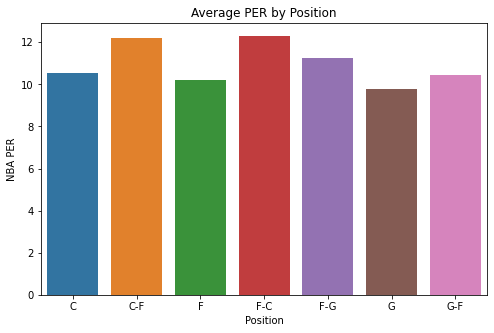

In [64]:
# this chart displays the average PER by position
plt.figure(figsize=(8, 5))
sns.barplot(
    x=per_by_pos['position'],
    y=per_by_pos['NBA_per']
)
plt.title('Average PER by Position')
plt.xlabel('Position')
plt.ylabel('NBA PER')

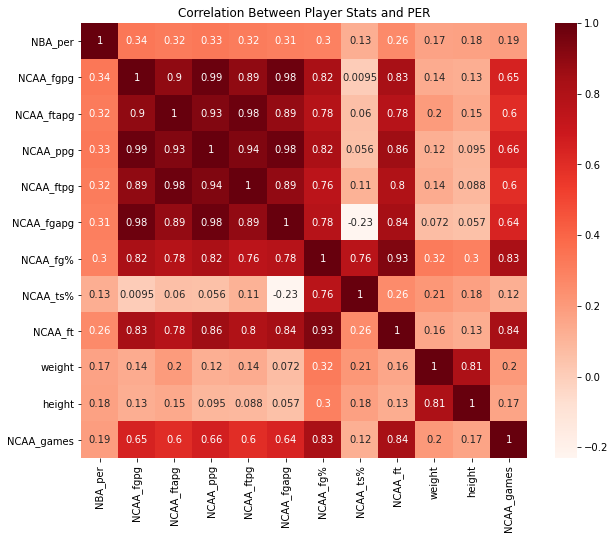

In [65]:
# heatmap to examine the correlation between NCAA statistics and PER
plt.figure(figsize=(10,8))
cor_sorted = final_df[['NBA_per','NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ppg', 'NCAA_ftpg', 
                   'NCAA_fgapg', 'NCAA_fg%', 'NCAA_ts%',
                   'NCAA_ft', 'weight', 'height', 'NCAA_games'
                ]].corr()
sns.heatmap(cor_sorted, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Between Player Stats and PER')
plt.show()

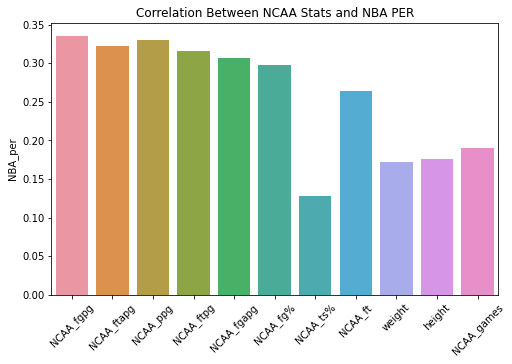

In [66]:
# bar chart to display the NCAA stats that have the highest correlation with PER
# shows the same information as the first row (or column) of the heatmap above
plt.figure(figsize=(8, 5))
sns.barplot(
    x=cor_sorted.columns[1:],
    y=cor_sorted['NBA_per'][1:]
)
plt.title('Correlation Between NCAA Stats and NBA PER')
plt.xticks(rotation=45)
plt.show()

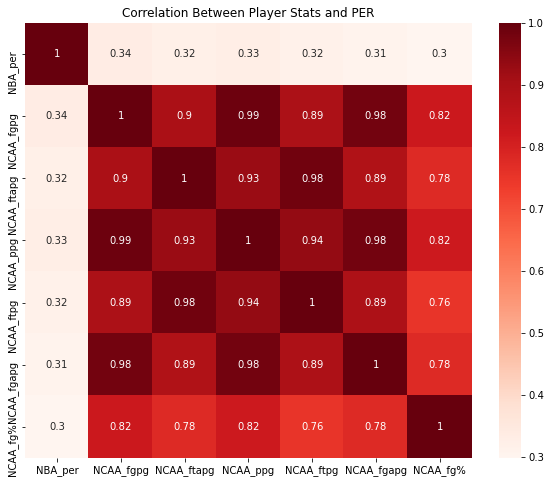

In [67]:
# smaller heatmap to get a better view of the stats that are most highly correlated with PER
plt.figure(figsize=(10,8))
cor_sorted_smaller = final_df[['NBA_per','NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ppg', 'NCAA_ftpg', 
                   'NCAA_fgapg', 'NCAA_fg%'
                ]].corr()
sns.heatmap(cor_sorted_smaller, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Between Player Stats and PER')
plt.show()

In [68]:
# creating a new dataframe to use for a multiple linear regression model
# this dataframe is a copy of the cleaned dataset, without redundant stats and NBA stats besides PER
PER_df = final_df[['NBA_per',       
       'NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_fgapg',
       'weight', 'height',
       'NCAA_games', 'NCAA_3ptpg',
       'NCAA_3ptapg'
                ]].dropna()

# predictor variables include NCAA stats and physical attributes
PER_X = PER_df[['NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ftpg', 
       'NCAA_fgapg',
       'weight', 'height',
       'NCAA_games', 'NCAA_3ptpg',
       'NCAA_3ptapg']]

# dependent variable is PER
PER_Y = PER_df[['NBA_per']]

In [69]:
# splitting the data into train and test sets
PER_train_X, PER_test_X, PER_train_Y, PER_test_Y = train_test_split(PER_X, PER_Y, test_size=0.2, random_state=200)

In [70]:
# adding a constant in order to use OLS
PER_train_X = sm.add_constant(PER_train_X)

/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
# creating a multiple linear regression model with the training sets
model = sm.OLS(PER_train_Y, PER_train_X).fit()

In [72]:
# adding a constant in order to use OLS
PER_test_X = sm.add_constant(PER_test_X)

# predicting player PER values based on the test set
predictions = model.predict(PER_test_X)

In [73]:
# transforming the predictions into a list
pred = predictions.tolist()

# transforming the actual PER values into a list
actual = PER_test_Y['NBA_per'].tolist()

# creating a dataframe containing predicted and actual PER values
pred_v_actual = pd.DataFrame(list(zip(actual, pred)), columns=['Actual PER', 'Predicted PER'])

<Figure size 864x720 with 0 Axes>

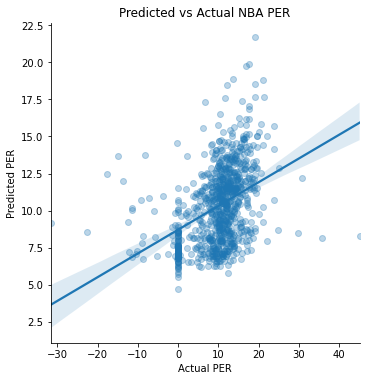

In [74]:
# plotting the predicted and actual values to see if there is a correlation
plt.figure(figsize=(12,10))
sns.lmplot(
    x='Actual PER',
    y='Predicted PER',
    data=pred_v_actual,
    fit_reg=True,
    scatter_kws={'alpha':0.3}
)
plt.title('Predicted vs Actual NBA PER')
plt.show()

In [75]:
# checking the model summary to see the results
# within an adjusted R-squared of 0.087, this model is very innacurate
print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                NBA_per   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     66.50
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          3.74e-113
Time:                        21:01:30   Log-Likelihood:                -11294.
No. Observations:                3442   AIC:                         2.261e+04
Df Residuals:                    3432   BIC:                         2.267e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.6244      3.252     -1.730      

Looking at the accuracy of our regression model, our model was not accurate in determining the PER, player efficiency rating score, of players in the NBA. This may show us that each player just has far too many features for us to come up with distinct, accurate scores for their PER. Their PER and overall performance could be influenced by many other confounding factors that we cannot be in control over to analyze.

Among our model, we have noticed that there are many features that we consider for it. Given that we had more time to look into these specifics, we could try to take features out one at a time until we get a score that is much better than what we have gotten of 0.087. Another approach that we could possibly take is to try out other combinations of features in our model, however, it is important to note that this may not be as accurate since we are selecting and choosing. This could lead to selective biases in our analysis that may not show a representative model.

# Ethics & Privacy

In terms of privacy, the data that we intend to collect is readily available to the general public, so privacy is not one of our main concerns. Biases in our model could exist since the process of drafting players into the NBA is a fundamentally biased process. Scouts and general managers look for certain characteristics in potential players before signing them, and biases in their selection process have a direct impact on which players get a chance to prove themselves in the league. Without taking the proper steps to minimize bias in our model, we could potentially create a model which reinforces those biases and would make it harder for certain players to be drafted if NBA teams were to use our model. In order to detect these biases, we will analyze the datasets we collect to determine what player characteristics are prevalent in drafted players, and aim to understand how much of that is due to bias and how much is due to actual ability. For example, NBA scouts may have a strong bias in preferring taller players, so we will need to determine whether this is a reasonable strategy or an unhelpful bias. Certain “smaller” players with smaller measurements such as Stephen Curry and Donovan Mitchell were deemed by scouts as too “small” to thrive in the modern NBA but have developed into premier stars, indicating that the bias regarding height would not always be correct. 

However, this topic as a whole is particularly tricky in regards to certain types of discrimination such as age and body type. With how young many of these athletes are drafted, many of these players are still filling out into their own bodies, often needing professional NBA dieticians and physicians to realize their growth and full potential. When it comes to consistent athletic performance those factors are important. We will need to be extremely thorough in our efforts to understand how much unnecessary bias exists in the drafting process.


# Conclusion & Discussion

Due to a lack of a strong enough statistical correlation of the predicted PER of players measured in our study, we cannot accept our hypothesis that there exists a relationship between a NCAA basketball player’s statistics (height, collegiate league performance, efficiency ratings) and their success/player efficiency rating in the NBA.

Our analysis however still shows a relative, albeit weak, linear relationship between NCAA player performance and their future PER in the NBA. The scope of a player’s future performance could still possibly be predicted using a combination of multiple variables and statistics that we were unable to discover in our analysis due to using singular limited constraints in terms of singular data points. 


# Team Contributions

* Charles Ye - worked on Overview, Background & Prior Work, Hypothesis, Ethics & Privacy, Conclusion & Discussion, and contributed to the video.
* Victor Thai - Web Scraping, Data Cleaning, Data Analysis
* Thomas Fratantoni - Web Scraping, Data Cleaning, Data Analysis, Ethics & Privacy